In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn import metrics
df = pd.read_csv("KaggleV2-May-2016.csv", delimiter=',')
df = df.drop(['PatientId'], axis = 1)
df = df.drop(['Neighbourhood'], axis = 1)
df = df.drop(['AppointmentID'], axis = 1)
df = df.dropna()
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

df


,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No


In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold
gender_mapping = {"F":0 ,"M":1}
df.Gender = df.Gender.map(gender_mapping)
df.rename(columns={"No-show": "NoShow"}, inplace=True)
df_yes = df[df['NoShow'] == 'Yes'] #Nieobecny
df_no = df[df['NoShow'] == 'No'] #Obecny
print(len(df_yes))
print(len(df_no))



#df_no_undersampled = resample(df_no, n_samples=len(df_yes), replace=False, random_state=42)
#df= pd.concat([df_yes, df_no_undersampled])
YesNo_mapping = {"Yes": 1,"No": 0}
df.NoShow = df.NoShow.map(YesNo_mapping)

df


22319
88208


,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03,2016-06-07,56,0,0,0,0,0,1,0
110523,0,2016-05-03,2016-06-07,51,0,0,0,0,0,1,0
110524,0,2016-04-27,2016-06-07,21,0,0,0,0,0,1,0
110525,0,2016-04-27,2016-06-07,38,0,0,0,0,0,1,0


In [ ]:
df[df['ScheduledDay'] > df['AppointmentDay']]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
27033,1,2016-05-10,2016-05-09,38,0,0,0,0,1,0,1
55226,0,2016-05-18,2016-05-17,19,0,0,0,0,1,0,1
64175,0,2016-05-05,2016-05-04,22,0,0,0,0,0,0,1
71533,0,2016-05-11,2016-05-05,81,0,0,0,0,0,0,1
72362,1,2016-05-04,2016-05-03,7,0,0,0,0,0,0,1


In [ ]:
df = df[df['ScheduledDay'] <= df['AppointmentDay']]


In [ ]:
df[df['Age'] <= 0]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
59,0,2016-04-29,2016-04-29,0,0,0,0,0,0,0,0
63,1,2016-04-27,2016-04-29,0,0,0,0,0,0,0,0
64,1,2016-04-25,2016-04-29,0,0,0,0,0,0,1,0
65,1,2016-04-27,2016-04-29,0,0,0,0,0,0,0,0
67,0,2016-04-29,2016-04-29,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110345,0,2016-05-16,2016-06-01,0,0,0,0,0,0,0,0
110346,1,2016-06-06,2016-06-08,0,0,0,0,0,0,0,0
110454,0,2016-06-03,2016-06-03,0,0,0,0,0,0,0,0
110460,0,2016-06-03,2016-06-03,0,0,0,0,0,0,0,0


In [ ]:
df = df[(df.Age >= 0) & (df.Age <= 100)]
df

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03,2016-06-07,56,0,0,0,0,0,1,0
110523,0,2016-05-03,2016-06-07,51,0,0,0,0,0,1,0
110524,0,2016-04-27,2016-06-07,21,0,0,0,0,0,1,0
110525,0,2016-04-27,2016-06-07,38,0,0,0,0,0,1,0


In [ ]:
df['TimeToVisit'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days

In [ ]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,TimeToVisit
0,0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03,2016-06-07,56,0,0,0,0,0,1,0,35
110523,0,2016-05-03,2016-06-07,51,0,0,0,0,0,1,0,35
110524,0,2016-04-27,2016-06-07,21,0,0,0,0,0,1,0,41
110525,0,2016-04-27,2016-06-07,38,0,0,0,0,0,1,0,41


In [ ]:
df = df.drop(['AppointmentDay'], axis=1)
df = df.drop(['ScheduledDay'], axis=1)

x= df.drop(['NoShow'], axis=1)
y=df["NoShow"]


iht = InstanceHardnessThreshold(random_state=42)
x, y = iht.fit_resample(x, y)

x

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,TimeToVisit
0,0,62,0,0,0,0,0,0,0
1,0,76,0,1,0,0,0,0,2
2,0,30,1,0,0,0,0,1,3
3,0,65,0,0,0,0,0,0,0
4,1,46,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
44630,0,45,0,0,0,0,0,0,4
44631,1,33,0,1,0,0,0,0,0
44632,0,37,0,1,0,0,0,0,2
44633,1,33,0,1,0,0,0,0,2


In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score , precision_score , recall_score
rf = RandomForestClassifier(n_estimators=13)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")

F1 Score 0.9046656904686923
Accuracy 0.9046712221350958
Precision 0.9079365079365079
Recall 0.8999775230388851


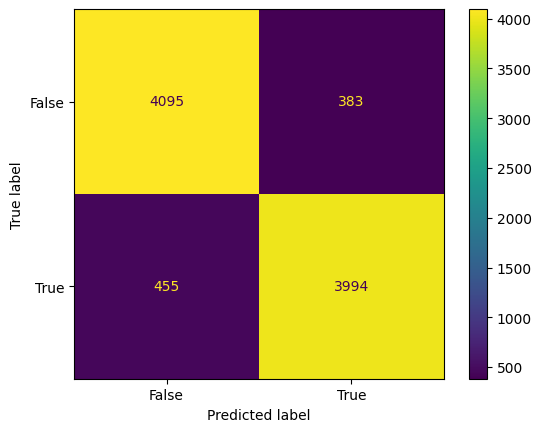

In [ ]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")

F1 Score 0.8689104012289897
Accuracy 0.8689369329001905
Precision 0.876809928752011
Recall 0.8574960665318049


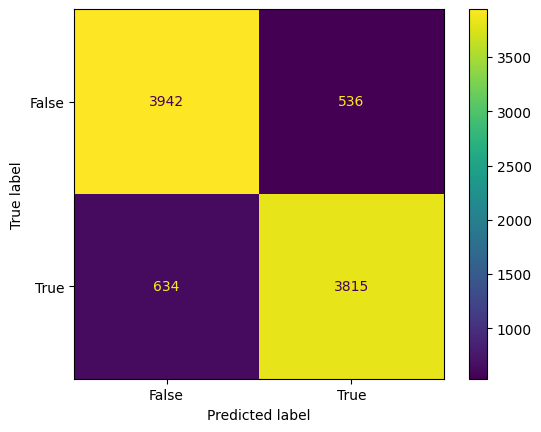

In [ ]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(f"Precision {precision_score(y_test, y_pred)}")

print(f"Recall {recall_score(y_test, y_pred)}")

F1 Score 0.7676240787597646
Accuracy 0.7676711101153804
Precision 0.7729257641921398
Recall 0.75590020229265


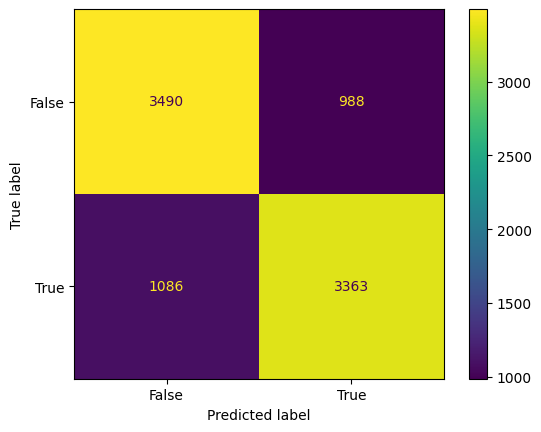

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=6, n_estimators=100, learning_rate=0.1, subsample=0.5, colsample_bytree=0.5, random_state=42)
clf.fit(x_train, y_train)

with open('xgb.pkl', 'wb') as f:
    pickle.dump(clf, f)

y_pred = clf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")

F1 Score 0.8379690021636577
Accuracy 0.8385795900078414
Precision 0.7992439315559092
Recall 0.9028995279838166


In [ ]:
print(x_test.iloc[2])
print(y[2])
zz=np.array([[0,81,0,0,0,0,0,0,0]])
result = clf.predict(zz)[0]
print(result)

Gender           0
Age             81
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
TimeToVisit      0
Name: 9603, dtype: int64
0
0


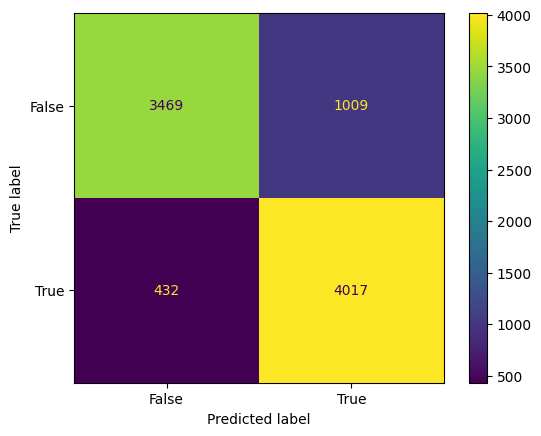

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# kompilacja modelu
# categorical_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=50)
model.evaluate(x_test, y_test)



Epoch 1/50
837/837 [==============================] - 7s 6ms/step - loss: 1.2015 - accuracy: 0.6394 - val_loss: 0.9711 - val_accuracy: 0.7525
Epoch 2/50
837/837 [==============================] - 4s 5ms/step - loss: 0.8219 - accuracy: 0.7657 - val_loss: 0.6882 - val_accuracy: 0.8009
Epoch 3/50
837/837 [==============================] - 4s 5ms/step - loss: 0.6493 - accuracy: 0.7969 - val_loss: 0.5687 - val_accuracy: 0.8076
Epoch 4/50
837/837 [==============================] - 5s 6ms/step - loss: 0.5600 - accuracy: 0.8015 - val_loss: 0.5081 - val_accuracy: 0.8061
Epoch 5/50
837/837 [==============================] - 4s 5ms/step - loss: 0.5100 - accuracy: 0.8052 - val_loss: 0.4817 - val_accuracy: 0.8081
Epoch 6/50
837/837 [==============================] - 4s 5ms/step - loss: 0.4892 - accuracy: 0.8038 - val_loss: 0.4755 - val_accuracy: 0.8067
Epoch 7/50
837/837 [==============================] - 5s 6ms/step - loss: 0.4789 - accuracy: 0.8074 - val_loss: 0.4559 - val_accuracy: 0.8111
Epoch 

[0.4465230405330658, 0.8146073818206787]

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.8).astype(int)
print(y_pred_classes)

279/279 [==============================] - 0s 2ms/step
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


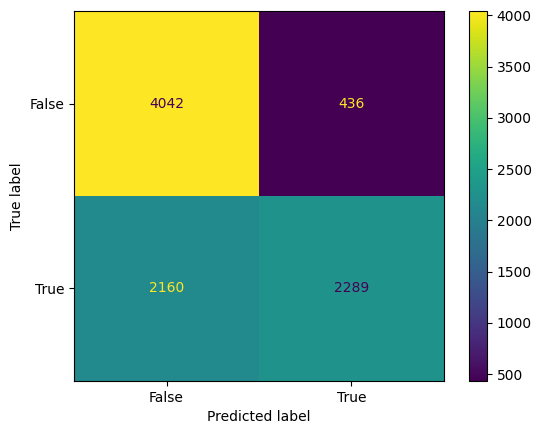

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

AttributeError: ignored